In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
from helper_functions import *
from sklearn.neighbors import KNeighborsRegressor

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
# Reading in data

train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(train.isna().sum().index,train.isna().sum().values))


[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 259),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 1369),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 38),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 1),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAb

In [37]:
mean_saleprice_map(train,'MSSubClass')

{30: 0,
 180: 1,
 45: 2,
 190: 3,
 90: 4,
 160: 5,
 50: 6,
 85: 7,
 40: 8,
 70: 9,
 80: 10,
 20: 11,
 75: 12,
 120: 13,
 60: 14}

In [38]:
train_df.MSSubClass.dtypes

dtype('int64')

In [39]:
test_df.MSSubClass.mode().values

AttributeError: 'tuple' object has no attribute 'MSSubClass'

In [41]:
test_df.MSSubClass.map(mean_saleprice_map(train_df,'MSSubClass'))

Id
1461    11.0
1462    11.0
1463    14.0
1464    14.0
1465    13.0
        ... 
2915     5.0
2916     5.0
2917    11.0
2918     7.0
2919    14.0
Name: MSSubClass, Length: 1459, dtype: float64

In [40]:
train_df = basic_filling(train)
test_df = basic_filling(test)

In [43]:
train_df,mapping_dict = mapped_values(train_df,train_df)
test_df,mapping_dict = mapped_values(test_df,train_df)

In [27]:
mapping_dict

{30: 0,
 180: 1,
 45: 2,
 190: 3,
 90: 4,
 160: 5,
 50: 6,
 85: 7,
 40: 8,
 70: 9,
 80: 10,
 20: 11,
 75: 12,
 120: 13,
 60: 14}

In [21]:
test_df.MSSubClass = test_df.MSSubClass.map(mapping_dict)

In [44]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,total_bath,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,AsbShng,AsphShn,Brk Cmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,WdShing,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,NaN,NaN,80.0,11622,1,0,3,3,3.0,NaN,2,NAmes,4,0,5,6,1961,1961,NaN,0,0.0,2,2,NaN,3,3,1,3,468.0,2,144.0,270.0,882.0,NaN,2,1,4,896,0,0,896,0.0,0.0,1,0,2,1,2.0,5,7.0,0,0,5,1961.0,1,1.0,730.0,3,3,2,140,0,0,0,120,0,0,3,0,6,2010,1.0,0,1,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,NaN,NaN,81.0,14267,1,0,2,3,3.0,NaN,2,NAmes,4,0,6,6,1958,1958,NaN,2,108.0,2,2,NaN,3,3,1,5,923.0,1,0.0,406.0,1329.0,NaN,2,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3.0,6,7.0,0,0,5,1958.0,1,1.0,312.0,3,3,2,393,36,0,0,0,0,0,0,12500,6,2010,1.5,0,0,1,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,NaN,NaN,74.0,13830,1,0,2,3,3.0,NaN,2,Gilbert,4,4,5,5,1997,1998,NaN,0,0.0,2,2,NaN,4,3,1,6,791.0,1,0.0,137.0,928.0,NaN,3,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,2.0,6,7.0,1,3,5,1997.0,3,2.0,482.0,3,3,2,212,34,0,0,0,0,0,3,0,3,2010,2.5,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,NaN,NaN,78.0,9978,1,0,2,3,3.0,NaN,2,Gilbert,4,4,6,6,1998,1998,NaN,2,20.0,2,2,NaN,3,3,1,6,602.0,1,0.0,324.0,926.0,NaN,4,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,3.0,7,7.0,1,4,5,1998.0,3,2.0,470.0,3,3,2,360,36,0,0,0,0,0,0,0,6,2010,2.5,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1465,NaN,NaN,43.0,5005,1,0,2,1,3.0,NaN,2,StoneBr,1,0,8,5,1992,1992,NaN,0,0.0,3,2,NaN,4,3,1,5,263.0,1,0.0,1017.0,1280.0,NaN,4,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3.0,5,7.0,0,0,5,1992.0,2,2.0,506.0,3,3,2,0,82,0,0,144,0,0,0,0,1,2010,2.0,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,1,0.0,0,0,0.0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [28]:
test_df.head()

AttributeError: 'tuple' object has no attribute 'head'

In [8]:
train_df = impute_lot_frontage(train_df,'train')
test_df = impute_lot_frontage(test_df,'test')

ValueError: Found array with 0 sample(s) (shape=(0, 121)) while a minimum of 1 is required by KNeighborsRegressor.

In [13]:
df_no_nans = test_df.drop('Neighborhood',axis=1)

In [14]:
df_no_nans

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,AsbShng,AsphShn,Brk Cmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,WdShing,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,NaN,NaN,80.0,11622,1,0,3,3,3.0,NaN,2,4,0,5,6,1961,1961,NaN,0,0.0,2,2,NaN,3,3,1,3,468.0,2,144.0,270.0,882.0,NaN,2,1,4,896,0,0,896,0.0,0.0,1,0,2,1,2.0,5,7.0,0,0,5,1961.0,1,1.0,730.0,3,3,2,140,0,0,0,120,0,0,3,0,6,2010,0,1,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,NaN,NaN,81.0,14267,1,0,2,3,3.0,NaN,2,4,0,6,6,1958,1958,NaN,2,108.0,2,2,NaN,3,3,1,5,923.0,1,0.0,406.0,1329.0,NaN,2,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3.0,6,7.0,0,0,5,1958.0,1,1.0,312.0,3,3,2,393,36,0,0,0,0,0,0,12500,6,2010,0,0,1,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,NaN,NaN,74.0,13830,1,0,2,3,3.0,NaN,2,4,4,5,5,1997,1998,NaN,0,0.0,2,2,NaN,4,3,1,6,791.0,1,0.0,137.0,928.0,NaN,3,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,2.0,6,7.0,1,3,5,1997.0,3,2.0,482.0,3,3,2,212,34,0,0,0,0,0,3,0,3,2010,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,NaN,NaN,78.0,9978,1,0,2,3,3.0,NaN,2,4,4,6,6,1998,1998,NaN,2,20.0,2,2,NaN,3,3,1,6,602.0,1,0.0,324.0,926.0,NaN,4,1,4,926,678,0,1604,0.0,0.0,2,1,3,1,3.0,7,7.0,1,4,5,1998.0,3,2.0,470.0,3,3,2,360,36,0,0,0,0,0,0,0,6,2010,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1465,NaN,NaN,43.0,5005,1,0,2,1,3.0,NaN,2,1,0,8,5,1992,1992,NaN,0,0.0,3,2,NaN,4,3,1,5,263.0,1,0.0,1017.0,1280.0,NaN,4,1,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3.0,5,7.0,0,0,5,1992.0,2,2.0,506.0,3,3,2,0,82,0,0,144,0,0,0,0,1,2010,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,1,0.0,0,0,0.0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,NaN,NaN,21.0,1936,1,0,3,3,3.0,NaN,2,0,4,4,7,1970,1970,NaN,0,0.0,2,2,NaN,3,3,1,1,0.0,1,0.0,546.0,546.0,NaN,3,1,4,546,546,0,1092,0.0,0.0,1,1,3,1,2.0,5,7.0,0,0,0,0.0,0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,0,0,6,2006,0,0,1,0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,1.0,1.0,0,0.0,0,0,0.0,0,0,0,0.0,

In [8]:
cat_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
               'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
               'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
               'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
num_features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
               'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice'
               ]

# Removing some features with a lot of missing values
# cat_features.remove('FireplaceQu')
# cat_features.remove('PoolQC')
# cat_features.remove('Fence')
# cat_features.remove('MiscFeature')

# num_features.remove('LotFrontage')


In [9]:
# Some basic fillling
train.Alley.fillna('None',inplace=True)
test.Alley.fillna('None',inplace=True)

train.FireplaceQu.fillna('None',inplace=True)
test.FireplaceQu.fillna('None',inplace=True)

In [10]:
def fill_missing_basic(df, num_cols, object_cols):
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
    object_dict = {k:v[0] for k, v in df[object_cols].mode().to_dict().items()}
    df[object_cols] = df[object_cols].fillna(object_dict)
    return df[num_cols+object_cols]

# train_df = fill_missing_basic(train,num_features,cat_features)
# test_df = fill_missing_basic(test,num_features[:-1],cat_features)

In [12]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(train_df.isna().sum().index,train_df.isna().sum().values))

[('LotArea', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('MasVnrArea', 0),
 ('BsmtFinSF1', 0),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAbvGr', 0),
 ('KitchenAbvGr', 0),
 ('TotRmsAbvGrd', 0),
 ('Fireplaces', 0),
 ('GarageYrBlt', 0),
 ('GarageCars', 0),
 ('GarageArea', 0),
 ('WoodDeckSF', 0),
 ('OpenPorchSF', 0),
 ('EnclosedPorch', 0),
 ('3SsnPorch', 0),
 ('ScreenPorch', 0),
 ('PoolArea', 0),
 ('MiscVal', 0),
 ('MoSold', 0),
 ('YrSold', 0),
 ('SalePrice', 0),
 ('MSSubClass', 0),
 ('MSZoning', 0),
 ('Street', 0),
 ('Alley', 0),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('E

In [13]:
# Splitting Train data into train and validate
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice',axis=1)
y = train_df.SalePrice

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=0)

X_test = test_df

## Using CatBoostRegressor

In [14]:
from catboost import CatBoostRegressor, Pool

In [15]:
model = CatBoostRegressor(verbose=False)

In [16]:
# Creating pool dataset to pass into catboost model
catboost_pool_train = Pool(X_train,y_train,cat_features=cat_features)
catboost_pool_val = Pool(X_val,y_val,cat_features=cat_features)
catboost_pool_test = Pool(test_df,cat_features=cat_features)

In [67]:
# Basic grid search to set optimized model parameters

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 8, 12],
        'l2_leaf_reg': [None, 0.5, 1, 3]}

model.grid_search(grid, catboost_pool_train)


bestTest = 36394.55857
bestIteration = 99

0:	loss: 36394.5585728	best: 36394.5585728 (0)	total: 191ms	remaining: 18.1s

bestTest = 34000.74674
bestIteration = 98

1:	loss: 34000.7467371	best: 34000.7467371 (1)	total: 351ms	remaining: 16.5s

bestTest = 36103.9584
bestIteration = 99

2:	loss: 36103.9584019	best: 34000.7467371 (1)	total: 523ms	remaining: 16.2s

bestTest = 31085.84322
bestIteration = 85

3:	loss: 31085.8432170	best: 31085.8432170 (3)	total: 687ms	remaining: 15.8s

bestTest = 36732.02361
bestIteration = 99

4:	loss: 36732.0236093	best: 31085.8432170 (3)	total: 861ms	remaining: 15.7s

bestTest = 32494.84784
bestIteration = 89

5:	loss: 32494.8478394	best: 31085.8432170 (3)	total: 1.03s	remaining: 15.5s

bestTest = 34077.2984
bestIteration = 149

6:	loss: 34077.2983964	best: 31085.8432170 (3)	total: 1.32s	remaining: 16.8s

bestTest = 33435.20624
bestIteration = 144

7:	loss: 33435.2062391	best: 31085.8432170 (3)	total: 1.58s	remaining: 17.4s

bestTest = 34053.93469
bestIter


bestTest = 31105.90014
bestIteration = 134

67:	loss: 31105.9001362	best: 27928.3191673 (53)	total: 4m 8s	remaining: 1m 42s

bestTest = 32546.0588
bestIteration = 199

68:	loss: 32546.0587963	best: 27928.3191673 (53)	total: 4m 38s	remaining: 1m 48s

bestTest = 31807.35928
bestIteration = 179

69:	loss: 31807.3592798	best: 27928.3191673 (53)	total: 5m 16s	remaining: 1m 57s

bestTest = 32459.58107
bestIteration = 199

70:	loss: 32459.5810749	best: 27928.3191673 (53)	total: 5m 39s	remaining: 1m 59s

bestTest = 31864.57554
bestIteration = 198

71:	loss: 31864.5755353	best: 27928.3191673 (53)	total: 6m 8s	remaining: 2m 2s
Estimating final quality...
Training on fold [0/3]

bestTest = 32803.91874
bestIteration = 198

Training on fold [1/3]

bestTest = 28560.38697
bestIteration = 188

Training on fold [2/3]

bestTest = 29501.38493
bestIteration = 195



{'params': {'depth': 8,
  'l2_leaf_reg': 3,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [75]:
len(sorted_feature_importance)

74

Text(0.5, 0, 'CatBoost Feature Importance')

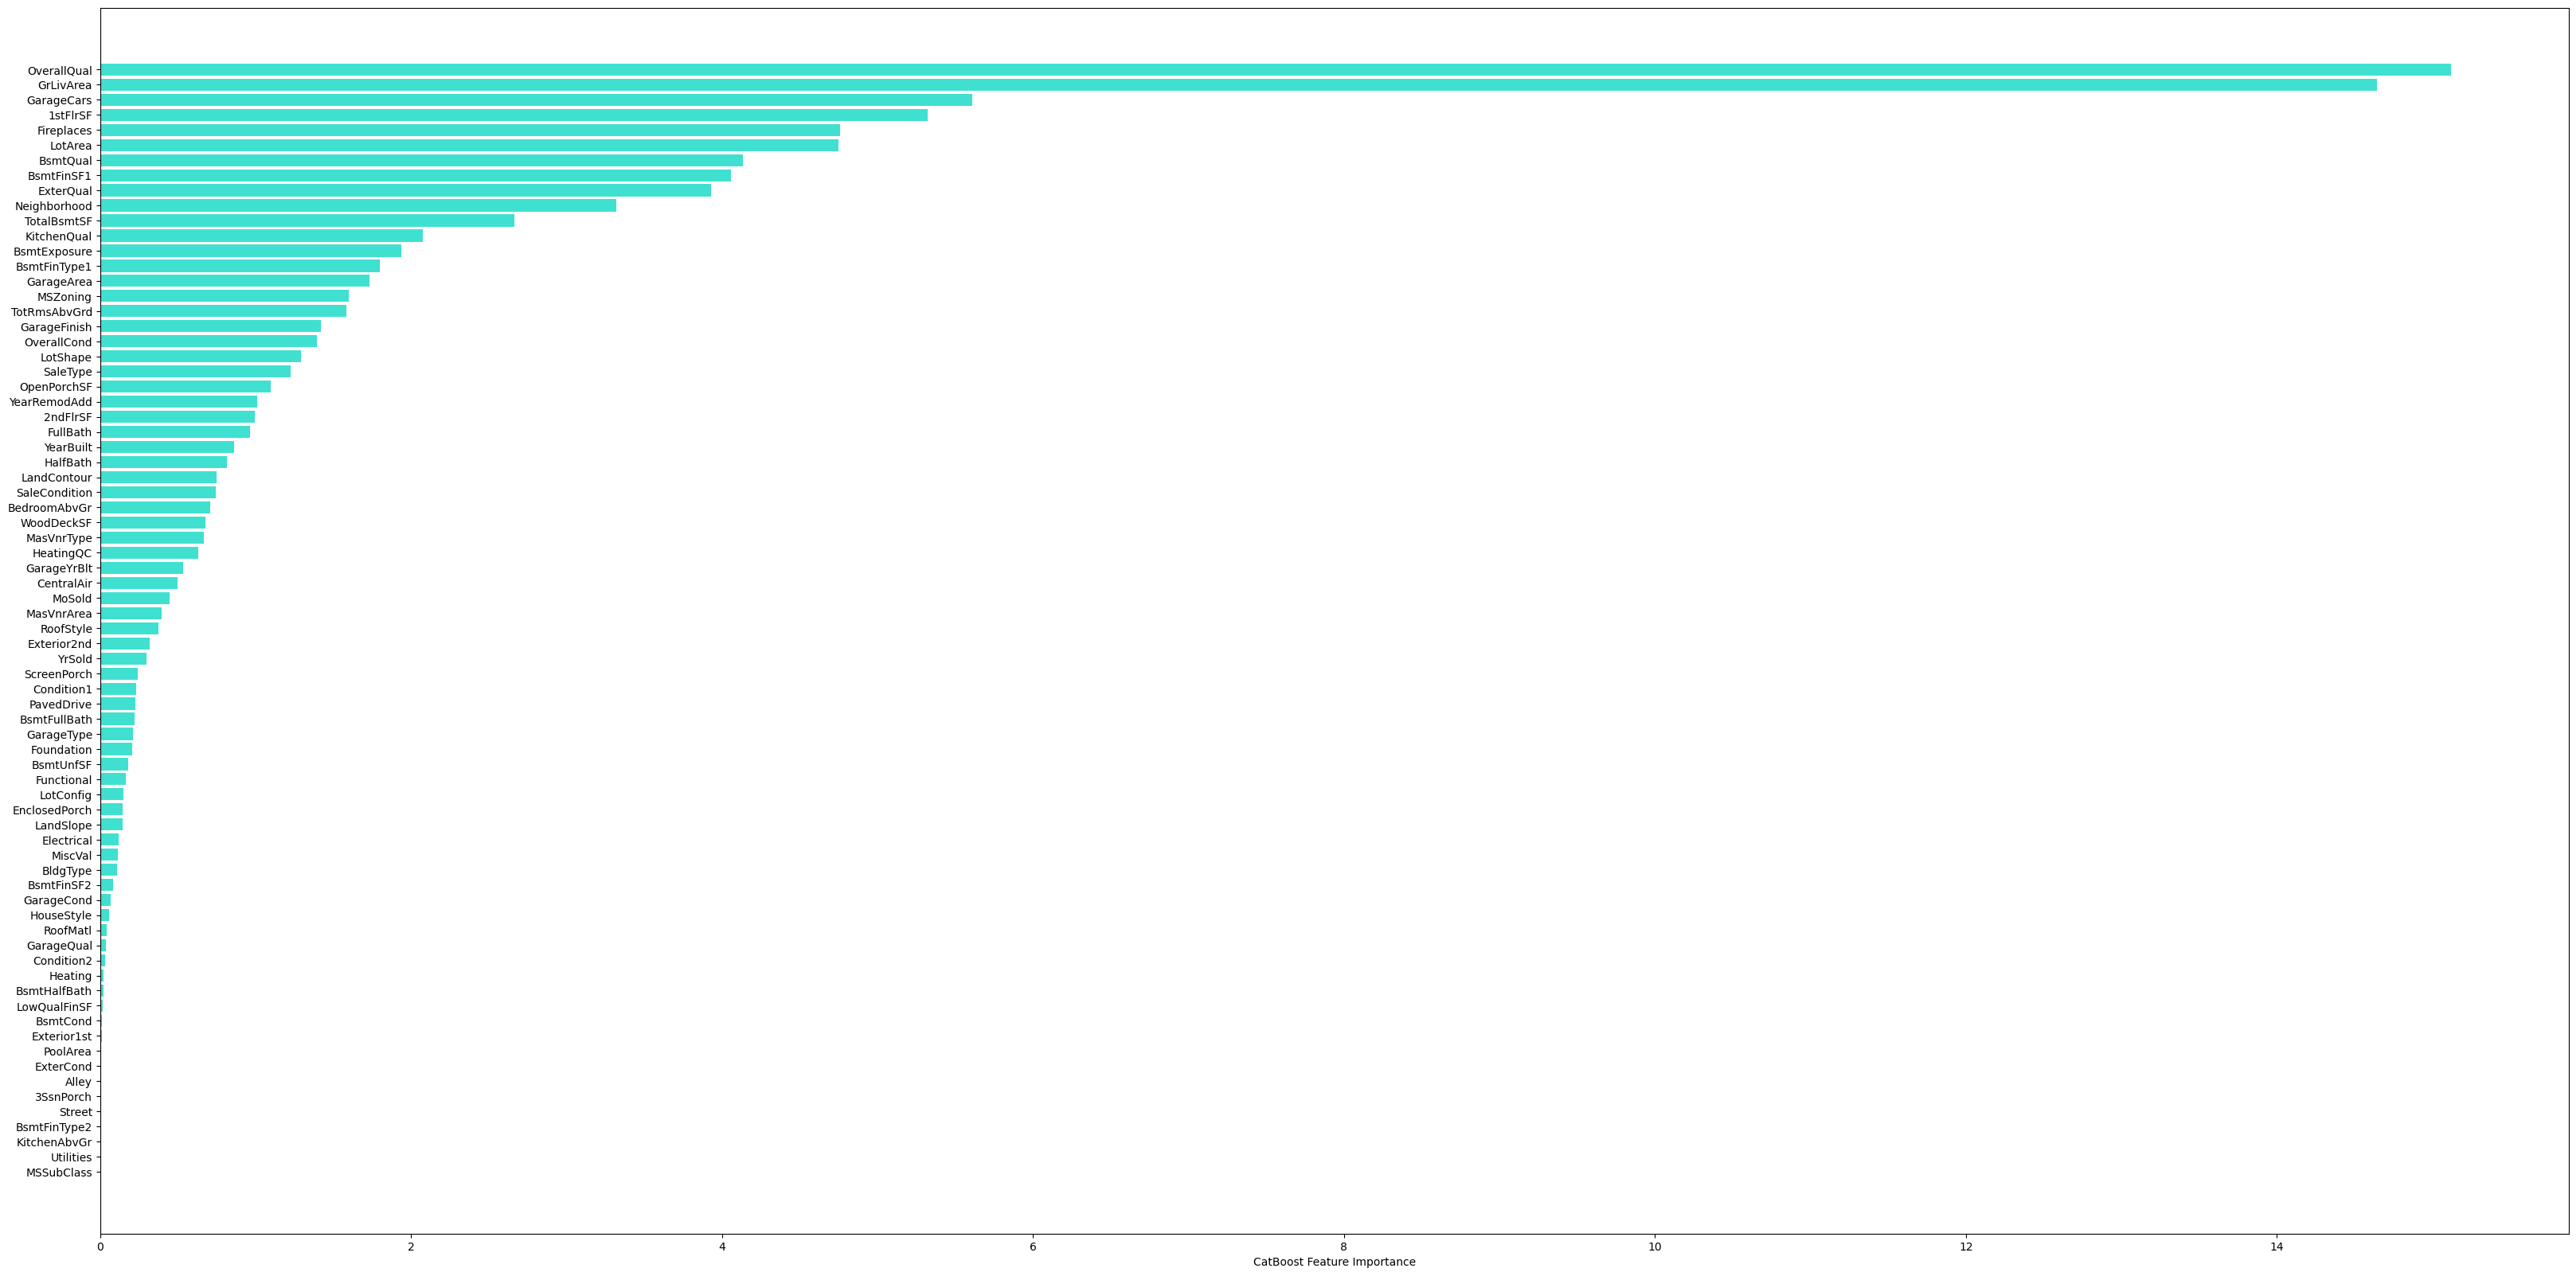

In [82]:
## Appears to have quite a bit of less useful features, but removing tends to make the model perform worse on test
sorted_feature_importance = model.feature_importances_.argsort()

plt.figure(figsize=(40,20))

plt.barh(X_train.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")


In [83]:
# Creating submission - catboost_submission_gs.csv 0.13327
preds = model.predict(catboost_pool_test)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_gs.csv',index=False)


In [87]:
model.get_params()

{'loss_function': 'RMSE',
 'verbose': False,
 'depth': 8,
 'l2_leaf_reg': 3,
 'iterations': 200,
 'learning_rate': 0.1}

In [ ]:
## Reducing features for model already built, based on top feature importances

In [109]:
# Only 34 features have importance >0.5, so will keep those only
len([i for i in model.feature_importances_[sorted_feature_importance] if i >=.5])

34

In [117]:
model = CatBoostRegressor(loss_function='RMSE',verbose=False,depth= 8,l2_leaf_reg= 3,iterations=200)
    
model.select_features(
    catboost_pool_train
    ,eval_set=catboost_pool_val
    ,features_for_select=list(X_train.columns)
    ,num_features_to_select=42
    ,steps=5
    ,algorithm='RecursiveByLossFunctionChange'
    ,shap_calc_type='Regular'
    ,logging_level='Silent'
    ,train_final_model=True
    )

{'selected_features': [0,
  1,
  2,
  3,
  4,
  6,
  9,
  10,
  11,
  13,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  29,
  32,
  35,
  38,
  39,
  42,
  43,
  44,
  46,
  47,
  53,
  56,
  58,
  59,
  62,
  63,
  65,
  66,
  67,
  68,
  71,
  72],
 'eliminated_features_names': ['MasVnrArea',
  'BsmtUnfSF',
  'EnclosedPorch',
  'ExterCond',
  'BsmtHalfBath',
  'RoofMatl',
  'BsmtFinSF2',
  'Exterior2nd',
  'SaleCondition',
  'PoolArea',
  'MasVnrType',
  'Alley',
  'GarageQual',
  'Street',
  '3SsnPorch',
  'Condition2',
  'MSSubClass',
  'Utilities',
  'LowQualFinSF',
  'MiscVal',
  'YrSold',
  'RoofStyle',
  'BsmtFinType2',
  'BsmtCond',
  'Heating',
  'Electrical',
  'LotConfig',
  'BsmtFullBath',
  'GarageCond',
  'Foundation',
  'KitchenAbvGr',
  'Exterior1st'],
 'loss_graph': {'main_indices': [0, 8, 15, 21, 27, 32],
  'removed_features_count': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,

In [118]:
# Creating submission - catboost_submission_gs_feat_red.csv - 34 Features: 0.14973, 55 Features: 0.15019
# 42 Features: 0.14734
preds = model.predict(catboost_pool_test)

pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_gs_feat_red.csv',index=False)

## Testing Feature Reduction method in CatBoost

In [33]:
value_tuples = []

for i in range(12,len(X_train.columns)):
    
    model = CatBoostRegressor(verbose=False)
    
    model.select_features(
    catboost_pool_train
    ,eval_set=catboost_pool_val
    ,features_for_select=list(X_train.columns)
    ,num_features_to_select=i
    ,steps=3
    ,algorithm='RecursiveByLossFunctionChange'
    ,shap_calc_type='Regular'
    ,logging_level='Silent'
    ,train_final_model=True
    )
    
    train_preds = model.predict(catboost_pool_train)
    test_preds = model.predict(catboost_pool_val)
    
    rms_train = (mean_squared_error(np.log10(y_train), np.log10(train_preds), squared=True))**0.5
    
    rms_val = (mean_squared_error(np.log10(y_val), np.log10(test_preds), squared=True))**0.5
    
    print('Currently at step: ',i)
    
    value_tuples.append((i,rms_train,rms_val))
    

Currently at step:  12
Currently at step:  13
Currently at step:  14
Currently at step:  15
Currently at step:  16
Currently at step:  17
Currently at step:  18
Currently at step:  19
Currently at step:  20
Currently at step:  21
Currently at step:  22
Currently at step:  23
Currently at step:  24
Currently at step:  25
Currently at step:  26
Currently at step:  27
Currently at step:  28
Currently at step:  29
Currently at step:  30
Currently at step:  31
Currently at step:  32
Currently at step:  33
Currently at step:  34
Currently at step:  35
Currently at step:  36
Currently at step:  37
Currently at step:  38
Currently at step:  39
Currently at step:  40
Currently at step:  41
Currently at step:  42
Currently at step:  43
Currently at step:  44
Currently at step:  45
Currently at step:  46
Currently at step:  47
Currently at step:  48
Currently at step:  49
Currently at step:  50
Currently at step:  51
Currently at step:  52
Currently at step:  53
Currently at step:  54
Currently a

The number of features selection steps (3) is greater than the number of features to eliminate (2). The number of steps was reduced to 2.


Currently at step:  72


The number of features selection steps (3) is greater than the number of features to eliminate (1). The number of steps was reduced to 1.


Currently at step:  73


In [36]:
[i for i in value_tuples]

[(12, 0.042544592754418284, 0.05656463364055781),
 (13, 0.037242794461102346, 0.05640227404994418),
 (14, 0.04379127564132163, 0.05551964207763713),
 (15, 0.030589980560291625, 0.053795746045091866),
 (16, 0.03554965021053378, 0.05463870651676199),
 (17, 0.03386521982926041, 0.05539488130449046),
 (18, 0.027827607737681562, 0.055547377177237366),
 (19, 0.03038751385036296, 0.05456964171816206),
 (20, 0.029657879239731684, 0.05500046838222147),
 (21, 0.026848957147936458, 0.05617435848516198),
 (22, 0.026975709782713273, 0.05511264554262805),
 (23, 0.03218695402785873, 0.056233955495748986),
 (24, 0.028572185700097487, 0.055302021808594524),
 (25, 0.02737040996890019, 0.05477798302587891),
 (26, 0.03281752224899913, 0.05504069540013161),
 (27, 0.03410824687674923, 0.055854827241925774),
 (28, 0.0310769197972668, 0.05549299193679392),
 (29, 0.03547659806568369, 0.05480270566404233),
 (30, 0.03689231180188382, 0.05433808157318504),
 (31, 0.028653554274902213, 0.05463815414746951),
 (32, 0

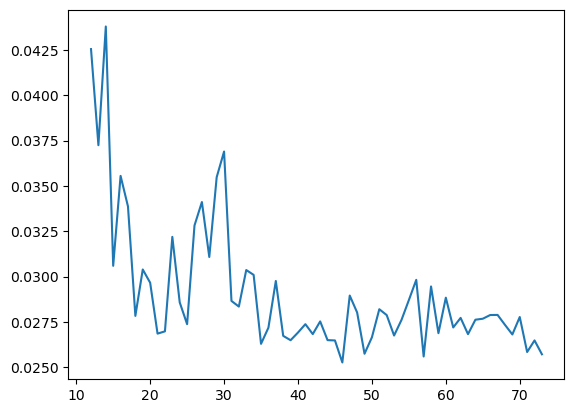

In [41]:
plt.plot([i[0] for i in value_tuples],[i[1] for i in value_tuples])

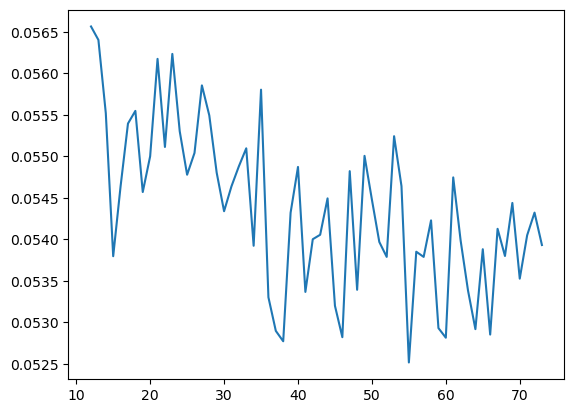

In [42]:
plt.plot([i[0] for i in value_tuples],[i[2] for i in value_tuples])

In [50]:
## Removing unimportant features, based on RSME analysis above

model = CatBoostRegressor(verbose=False,depth=15,iterations=10,thread_count=-1)

model.select_features(
    catboost_pool_train
    ,eval_set=catboost_pool_val
    ,features_for_select=list(X_train.columns)
    ,num_features_to_select=55
    ,steps=5
    ,algorithm='RecursiveByLossFunctionChange'
    ,shap_calc_type='Regular'
    ,logging_level='Silent'
    ,train_final_model=True
    )

{'selected_features': [0,
  1,
  2,
  3,
  4,
  9,
  10,
  13,
  14,
  16,
  17,
  19,
  20,
  22,
  23,
  24,
  26,
  30,
  31,
  34,
  35,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  65,
  66,
  67,
  68,
  69,
  70,
  72,
  73],
 'eliminated_features_names': ['EnclosedPorch',
  '2ndFlrSF',
  'Fireplaces',
  'BsmtUnfSF',
  'WoodDeckSF',
  'BsmtFinSF1',
  'Street',
  'ScreenPorch',
  'MasVnrArea',
  'BsmtFinSF2',
  'BsmtHalfBath',
  'Electrical',
  'PavedDrive',
  'YrSold',
  'BsmtQual',
  'BedroomAbvGr',
  'MoSold',
  '3SsnPorch',
  'LowQualFinSF'],
 'loss_graph': {'main_indices': [0, 4, 8, 12, 16, 19],
  'removed_features_count': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19],
  'loss_values': [37663.78336913085,
   36405.3305687001,
   35248.972525934725,
   34354.51927753386,
   33750.1765

In [51]:
# Submitting with 38 features: 0.12949, with 55 features: 0.13133, with 55 features and depth of 15: 0.17472
preds = model.predict(catboost_pool_test)

In [52]:
pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_feat_red.csv',index=False)


In [117]:
# Validating fit

train_preds = model.predict(catboost_pool_train)

In [119]:
from sklearn.metrics import mean_squared_error

rms = (mean_squared_error(np.log10(train.SalePrice), np.log10(train_preds), squared=True))**0.5

print(rms)

0.027524077487164098


In [74]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [80]:
model = CatBoostRegressor(verbose=False)

# Define the number of folds for cross-validation
num_folds = 5

# Create a KFold object to split the data into folds
kf = KFold(n_splits=num_folds, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model, catboost_pool_train, cv=kf, scoring='neg_mean_squared_error')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = -scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the scores
print('Mean squared error:', mean_score)
print('Standard deviation:', std_score)

TypeError: Singleton array array(<catboost.core.Pool object at 0x7f9b123efd60>, dtype=object) cannot be considered a valid collection.

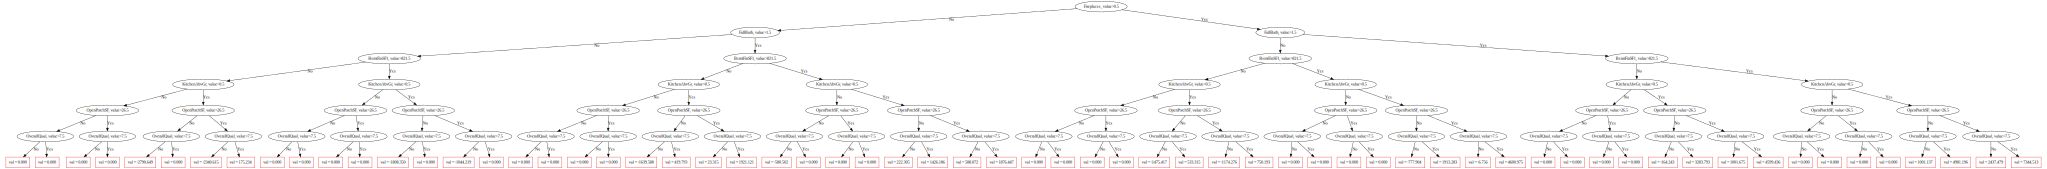

In [121]:
model.plot_tree(
    tree_idx=0,
    pool=catboost_pool_train, 
)

In [122]:
model.get_feature_importance(prettified=True).set_index('Feature Id')

,Importances
Feature Id,
OverallQual,18.175016
GrLivArea,14.530918
BsmtFinSF1,5.177520
TotalBsmtSF,4.752699
GarageCars,4.569097
...,...
Electrical,0.000000
GarageType,0.000000
GarageQual,0.000000


<Axes: xlabel='Feature Id'>

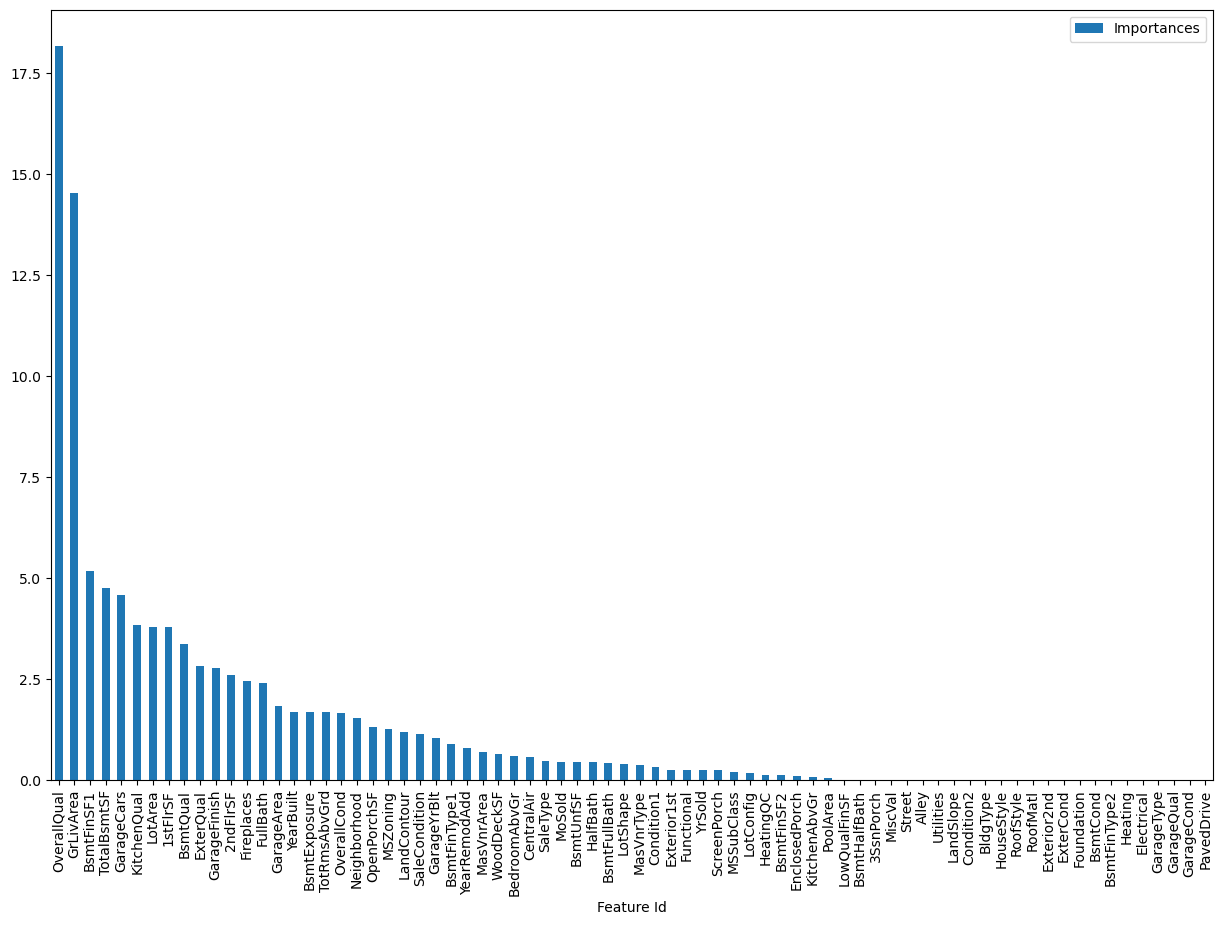

In [123]:
model.get_feature_importance(prettified=True).set_index('Feature Id').plot(kind='bar',figsize=(15,10))

## Recreating the model with log-scaled target

In [17]:
# Splitting Train data into train and validate
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice',axis=1)
y = np.log1p(train_df.SalePrice)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=0)

X_test = test_df

In [18]:
# Creating pool dataset to pass into catboost model
catboost_pool_train = Pool(X_train,y_train,cat_features=cat_features)
catboost_pool_val = Pool(X_val,y_val,cat_features=cat_features)
catboost_pool_test = Pool(test_df,cat_features=cat_features)

In [19]:
# Basic grid search to set optimized model parameters

model = CatBoostRegressor(verbose=False)

eval_metric='RSME'

grid = {'iterations': [1000],
        'learning_rate': [0.03, 0.1,1],
        'depth': [4, 6, 8, 12],
        'l2_leaf_reg': [0.5, 1, 3],
       'early_stopping_rounds':[200]}

model.grid_search(grid, catboost_pool_train)


bestTest = 0.1308352009
bestIteration = 986

0:	loss: 0.1308352	best: 0.1308352 (0)	total: 4.24s	remaining: 2m 28s

bestTest = 0.154680392
bestIteration = 999

1:	loss: 0.1546804	best: 0.1308352 (0)	total: 8.92s	remaining: 2m 31s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.1735887513
bestIteration = 20

2:	loss: 0.1735888	best: 0.1308352 (0)	total: 9.99s	remaining: 1m 49s

bestTest = 0.1317643132
bestIteration = 986

3:	loss: 0.1317643	best: 0.1308352 (0)	total: 14.1s	remaining: 1m 52s

bestTest = 0.1546597932
bestIteration = 999

4:	loss: 0.1546598	best: 0.1308352 (0)	total: 18.5s	remaining: 1m 54s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.2012029111
bestIteration = 27

5:	loss: 0.2012029	best: 0.1308352 (0)	total: 19.5s	remaining: 1m 37s

bestTest = 0.1398252731
bestIteration = 997

6:	loss: 0.1398253	best: 0.1308352 (0)	total: 23.6s	remaining: 1m 37s

bestTest = 0.1490857004
bestIteration = 995

7:	loss: 0.1490857	best: 0.1308352 

{'params': {'depth': 4,
  'od_wait': 200,
  'iterations': 1000,
  'learning_rate': 0.03,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               

In [27]:
model.get_params()

{'iterations': 1000,
 'learning_rate': 0.03,
 'depth': 4,
 'l2_leaf_reg': 0.5,
 'loss_function': 'RMSE',
 'od_wait': 200,
 'verbose': False,
 'eval_metric': 'RSME'}

In [33]:
model = CatBoostRegressor(iterations=6000,learning_rate=0.03,depth=4,l2_leaf_reg=0.5,\
                          od_wait=200,verbose=False)

In [34]:
catboost_pool_full_train = Pool(X,y,cat_features=cat_features)

model.fit(catboost_pool_full_train)

In [36]:
# Submitting with 38 features: 0.12949, with 55 features: 0.13133, with 55 features and depth of 15: 0.17472
preds = model.predict(catboost_pool_test)

preds = np.expm1(preds)

In [37]:
pd.DataFrame(preds,test_df.index,columns=(['SalePrice'])).reset_index()\
                            .to_csv('catboost_submission_log_target.csv',index=False)